In [1]:
import collections
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
import numpy as np

%matplotlib inline

In [5]:
ymd = collections.OrderedDict()
ymd['31aug15'] = '20150831'
ymd['30sep15'] = '20150930'
ymd['31oct15'] = '20151031'
ymd['30nov15'] = '20151130'
ymd['31dec15'] = '20151231'
ymd['31jan16'] = '20160131'
ymd['29feb16'] = '20160229'
ymd['31mar16'] = '20160331'
ymd['30apr16'] = '20160430'
ymd['31may16'] = '20160531'
ymd['30jun16'] = '20160630'
ymd['31jul16'] = '20160731'
ymd['31aug16'] = '20160831'
ymd['30sep16'] = '20160930'
ymd['31oct16'] = '20161031'
ymd['30nov16'] = '20161130'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

/results/SalishSea/nowcast-green/31aug15/SalishSea_1d_20150831_20150831_grid_T.nc


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


0.0510733800952
-0.000509099252843
/results/SalishSea/nowcast-green/30sep15/SalishSea_1d_20150930_20150930_grid_T.nc
0.199096395208
-0.00475398316387
/results/SalishSea/nowcast-green/31oct15/SalishSea_1d_20151031_20151031_grid_T.nc
0.227199681425
-0.00288154957384
/results/SalishSea/nowcast-green/30nov15/SalishSea_1d_20151130_20151130_grid_T.nc
0.211262157653
-0.000136715855693
/results/SalishSea/nowcast-green/31dec15/SalishSea_1d_20151231_20151231_grid_T.nc
0.220559733262
0.00181937254115
/results/SalishSea/nowcast-green/31jan16/SalishSea_1d_20160131_20160131_grid_T.nc
0.278381204669
0.00759059815577
/results/SalishSea/nowcast-green/29feb16/SalishSea_1d_20160229_20160229_grid_T.nc
0.261012315757
0.00120510724546
/results/SalishSea/nowcast-green/31mar16/SalishSea_1d_20160331_20160331_grid_T.nc
0.223421441811
0.00236145568924
/results/SalishSea/nowcast-green/30apr16/SalishSea_1d_20160430_20160430_grid_T.nc
0.351727665752
-0.00213248053233
/results/SalishSea/nowcast-green/31may16/SalishS

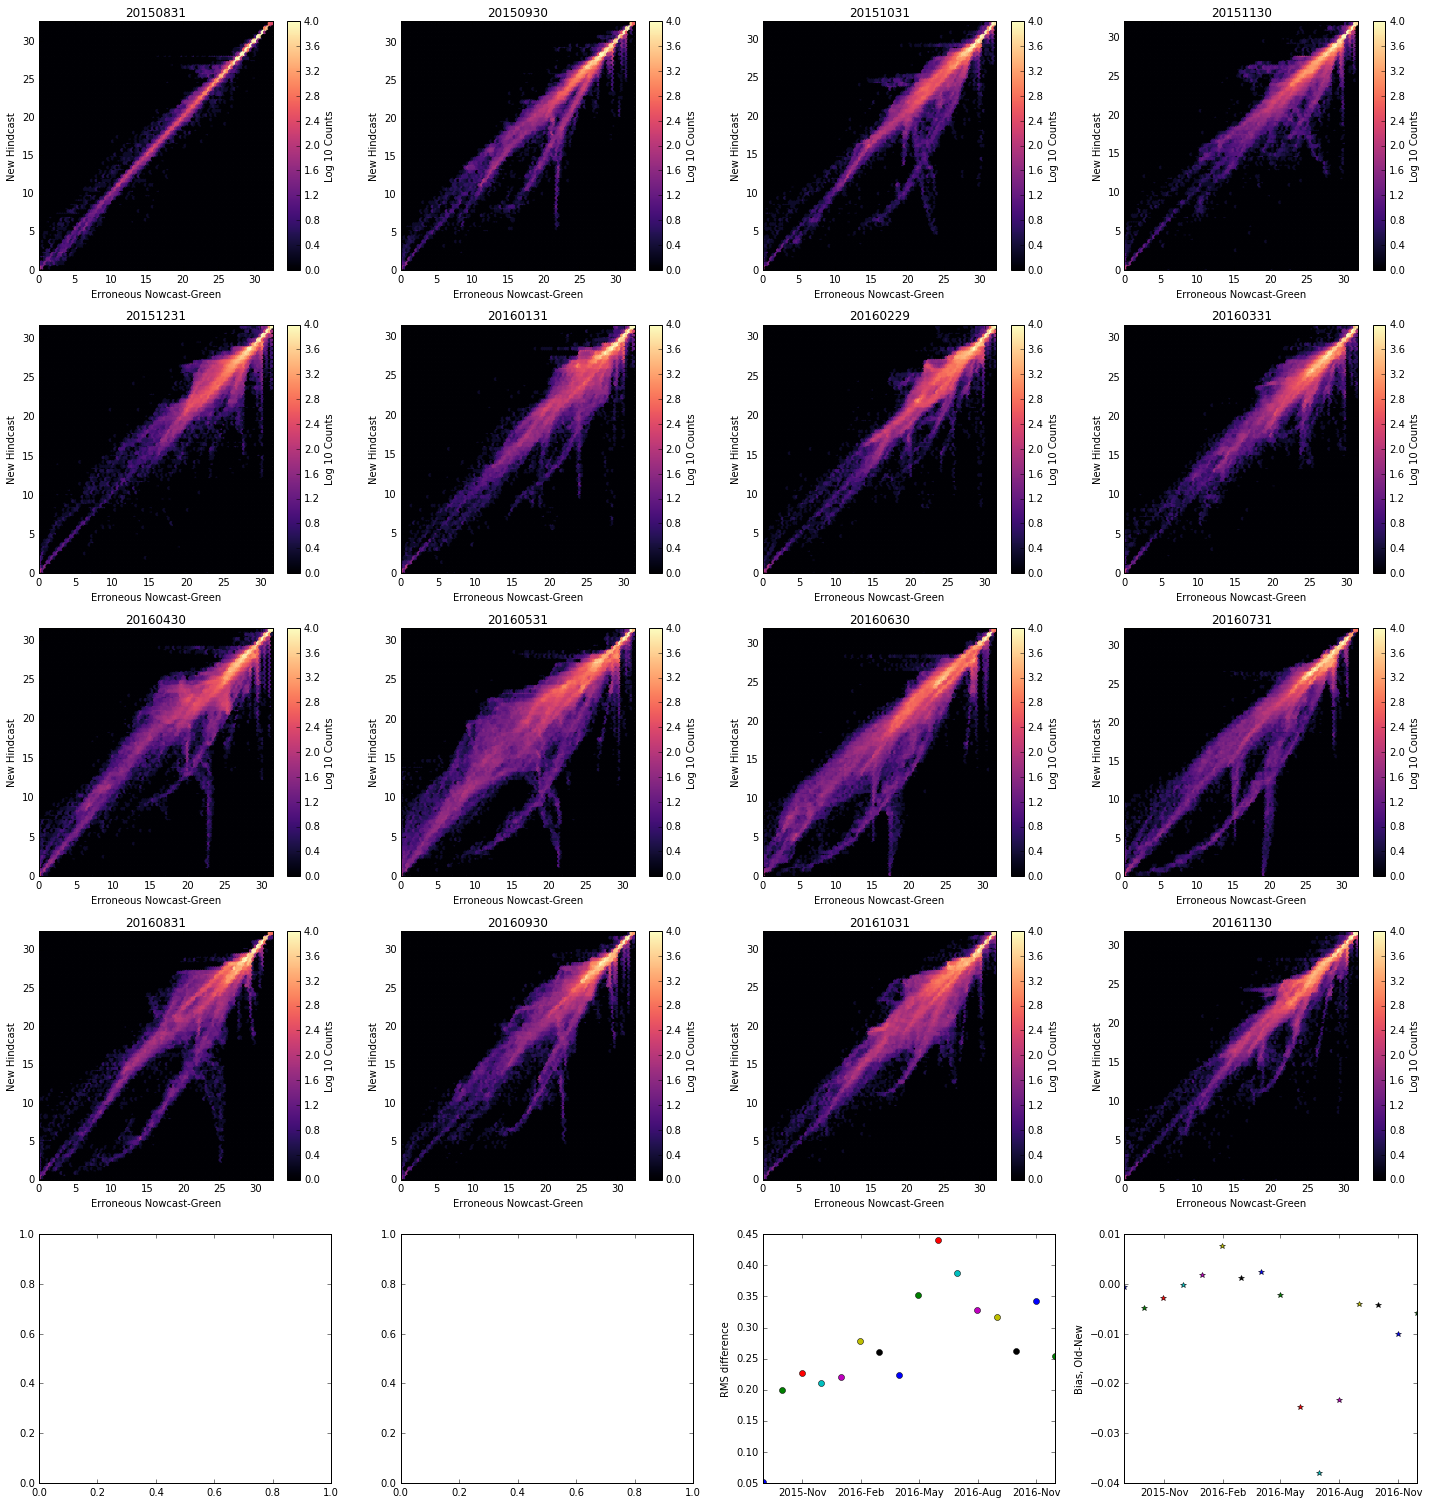

In [6]:
lastrow = 4
fig, axs = plt.subplots(lastrow+1, 4, figsize=(20, 21))
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%Y-%b')
count = 0
scount = 0
for date in ymd:
    filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[
        date] + '_grid_T.nc'
    print(filename)
    data_orig = nc.Dataset(filename)
    filename = new_hindcast + date + '/' + basefilename + ymd[
        date] + '_' + ymd[date] + '_grid_T.nc'
    data_new = nc.Dataset(filename)
    S1 = data_orig['vosaline'][0]
    S2 = data_new['vosaline'][0]
    k0 = 0
    k1 = 5
    mesh = axs[scount, count].hexbin(np.ndarray.flatten(S1[k0:k1]), np.ndarray.flatten(S2[k0:k1]), bins='log', 
                                     cmap='magma', vmax=4)
    cb = fig.colorbar(mesh, ax=axs[scount, count])
    cb.set_label('Log 10 Counts')
    axs[scount, count].set_title(ymd[date])
    axs[scount, count].set_xlabel('Erroneous Nowcast-Green')
    axs[scount, count].set_ylabel('New Hindcast')
    if count < 3:
        count = count + 1
    else:
        scount = scount + 1
        count = 0
    
    dt = datetime.datetime.strptime(ymd[date], '%Y%m%d')
    rms = np.sqrt(np.mean((S1-S2)**2))
    print(rms)
    axs[lastrow, 2].plot(dt, rms, 'o')
    axs[lastrow, 2].xaxis.set_major_locator(months)
    axs[lastrow, 2].xaxis.set_major_formatter(monthsFmt)
    axs[lastrow, 2].set_ylabel('RMS difference')
    axs[lastrow, 3].set_ylabel('Bias, Old-New')
    bias = np.mean(S1)-np.mean(S2)
    print(bias)
    axs[lastrow, 3].plot(dt, bias, '*')
    axs[lastrow, 3].xaxis.set_major_locator(months)
    axs[lastrow, 3].xaxis.set_major_formatter(monthsFmt)
plt.tight_layout()

# New Hindcast Versus Old Hindcast: Top 5 depths